<a href="https://colab.research.google.com/github/Thierno-dev/MachineLearningApprentissage/blob/main/RegressionLineairePlusieursVariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


import seaborn as sns #visualisation de donnees base sur matpotlib



# Chargement de données de la source

In [8]:
data = pd.read_csv("USA_Housing.csv")#Chargement de données

data.info()

data.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# Analyse des données

In [ ]:
sns.pairplot(data)#Comparer chaque données sur l'autre données colonne et colonne

# Perparer les données

Separer la base de données en X et en y

In [12]:
X = data[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms',
          'Area Population']]

y = data['Price']


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


Faire les train test x et y

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=101)

# Construction du modele et recherche des coefficient a et b

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
#Creation de l'instance

regression = LinearRegression()


In [17]:
#Entrainement du modele

regression.fit(X_train,y_train)

LinearRegression()

Trouver les coeficient a et b de la fonction b+ a1x1+a2x2+a3x3+....

In [19]:
print(regression.coef_)# coefficient a apres entrainement

print(regression.intercept_)#coefficient b apres entrainement

[2.16426796e+01 1.65227890e+05 1.21886319e+05 1.44672540e+03
 1.52409213e+01]
-2647617.0723030404


Visualisation des coefficient

In [20]:
coeff_df = pd.DataFrame(regression.coef_,X.columns,columns=["Coefficient"])

coeff_df

,Coefficient
Avg. Area Income,21.642680
Avg. Area House Age,165227.889797
Avg. Area Number of Rooms,121886.318611
Avg. Area Number of Bedrooms,1446.725402
Area Population,15.240921


# Effectuer la prediction du model

In [21]:
y_predict = regression.predict(X_test)

# Evaluation du modele

In [22]:
from sklearn import metrics

print("MAE:",metrics.mean_absolute_error(y_test,y_predict))

print("MSE:",metrics.mean_squared_error(y_test,y_predict))

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

print("R²:",metrics.r2_score(y_test,y_predict))

MAE: 81778.67738370104
MSE: 10331657030.971088
RMSE: 101644.75899411188
R²: 0.9161592499821088


# Representation graphique de ce modele

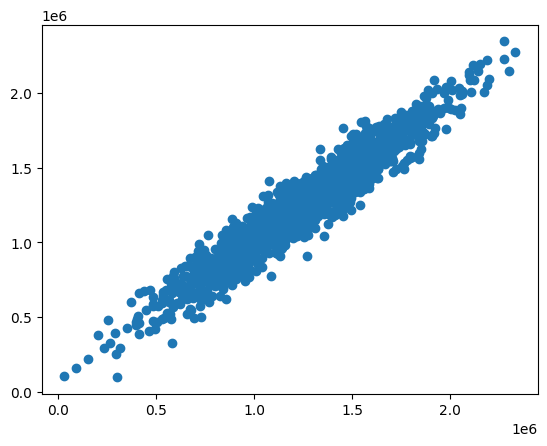

In [24]:
plt.scatter(y_test, y_predict)#l'algorithme a pas mal fonctionner car tendance a etre lineaire i.e une droite